In [1]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import os
from fastai.vision.all import *
from transformers import AutoModelForImageClassification
#os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from transformers import Swinv2Config, Swinv2ForImageClassification

In [2]:
df=pd.read_csv('ArtEmisv1.csv')
df

,art_style,painting,emotion,repetition
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,something else,10
1,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,sadness,10
2,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,something else,10
3,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,contentment,10
4,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,awe,10
...,...,...,...,...
454679,Cubism,gino-severini_a-dancer-1,awe,48
454680,Romanticism,ivan-aivazovsky_sea-at-night-1861,awe,8
454681,Romanticism,ivan-aivazovsky_sea-at-night-1861,excitement,8
454682,Romanticism,ivan-aivazovsky_sea-at-night-1861,contentment,8


In [3]:
def modo(x):
    if  x.value_counts()[0]>=sum(x.value_counts())*1.0 :
        return pd.Series.mode(x)
    else:
        return x.value_counts()[:3].index.tolist()

In [4]:
def emtype(x):
    if x.emotion=='sadness':
        return "negative"
    elif x.emotion=='fear':
        return "negative"
    elif x.emotion=='disgust':
        return "negative"
    elif x.emotion=='anger':
        return "negative"
    elif x.emotion=='contentment':
        return "positive"
    elif x.emotion=='awe':
        return "positive"
    elif x.emotion=='amusement':
        return "positive"
    elif x.emotion=='excitement':
        return "positive"
    else:
        return "something else"
    

In [5]:
dfemo=df
dfemo['emotype']= dfemo.apply(emtype,axis=1)
dfemo

,art_style,painting,emotion,repetition,emotype
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,something else,10,something else
1,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,sadness,10,negative
2,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,something else,10,something else
3,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,contentment,10,positive
4,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,awe,10,positive
...,...,...,...,...,...
454679,Cubism,gino-severini_a-dancer-1,awe,48,positive
454680,Romanticism,ivan-aivazovsky_sea-at-night-1861,awe,8,positive
454681,Romanticism,ivan-aivazovsky_sea-at-night-1861,excitement,8,positive
454682,Romanticism,ivan-aivazovsky_sea-at-night-1861,contentment,8,positive


In [6]:
#dfemo=dfemo.groupby(["art_style","painting"])["emotion"].agg(modo).reset_index()
#dfemo

In [7]:
dfemo=dfemo.groupby(["art_style","painting"])["emotype"].agg(modo).reset_index()

dfemo

,art_style,painting,emotype
0,Abstract_Expressionism,aaron-siskind_acolman-1-1955,"[positive, negative, something else]"
1,Abstract_Expressionism,aaron-siskind_chicago-1951,"[negative, positive, something else]"
2,Abstract_Expressionism,aaron-siskind_chicago-6-1961,"[negative, something else]"
3,Abstract_Expressionism,aaron-siskind_feet-102-1957,"[something else, negative, positive]"
4,Abstract_Expressionism,aaron-siskind_gloucester-16a-1944,"[something else, negative]"
...,...,...,...
80026,Ukiyo_e,utagawa-toyokuni_the-actor-otani-monzo-in-the-role-of-igarashi-tenzen,"[positive, negative]"
80027,Ukiyo_e,utagawa-toyokuni_the-heian-courtier,"[positive, negative]"
80028,Ukiyo_e,utagawa-toyokuni_the-promenade,"[positive, negative]"
80029,Ukiyo_e,utagawa-toyokuni_three-beauties-playing-battledore-and-shuttlecock,"[positive, something else]"


In [8]:
t=type(dfemo.emotype[0])
dfemo=dfemo[dfemo["emotype"].apply(lambda x: type(x) !=t )].reset_index()
dfemo = dfemo.drop('index', axis=1)
dfemo

,art_style,painting,emotype
0,Abstract_Expressionism,aaron-siskind_yuchitan-1-1955,negative
1,Abstract_Expressionism,aki-kuroda_conti-nuit-1979,negative
2,Abstract_Expressionism,alexander-calder_the-dog,positive
3,Abstract_Expressionism,alice-baber_abstract-composition-1969-1,positive
4,Abstract_Expressionism,alice-baber_lord-of-the-rainbow-1976,positive
...,...,...,...
16754,Ukiyo_e,utagawa-toyokuni-ii_segawa-kikunojo-v-as-onnagata,positive
16755,Ukiyo_e,utagawa-toyokuni-ii_sumo-wrester-in-blue-brown-striped-underkimono,positive
16756,Ukiyo_e,utagawa-toyokuni-ii_view-of-oshima-from-atami-beach,positive
16757,Ukiyo_e,utagawa-toyokuni-ii_wild-geese-at-miho-kiyomi-temple-suruga-yoshiwara,positive


In [9]:
dfemo=dfemo[dfemo.emotype!="something else"].reset_index()
dfemo = dfemo.drop('index', axis=1)
dfemo

,art_style,painting,emotype
0,Abstract_Expressionism,aaron-siskind_yuchitan-1-1955,negative
1,Abstract_Expressionism,aki-kuroda_conti-nuit-1979,negative
2,Abstract_Expressionism,alexander-calder_the-dog,positive
3,Abstract_Expressionism,alice-baber_abstract-composition-1969-1,positive
4,Abstract_Expressionism,alice-baber_lord-of-the-rainbow-1976,positive
...,...,...,...
16739,Ukiyo_e,utagawa-toyokuni-ii_segawa-kikunojo-v-as-onnagata,positive
16740,Ukiyo_e,utagawa-toyokuni-ii_sumo-wrester-in-blue-brown-striped-underkimono,positive
16741,Ukiyo_e,utagawa-toyokuni-ii_view-of-oshima-from-atami-beach,positive
16742,Ukiyo_e,utagawa-toyokuni-ii_wild-geese-at-miho-kiyomi-temple-suruga-yoshiwara,positive


In [10]:
dfemo['path']= dfemo.apply(lambda x: 'dataset\\wikiart\\'+x['art_style']+"\\"+ x['painting']+".jpg", axis=1)
dfemo

,art_style,painting,emotype,path
0,Abstract_Expressionism,aaron-siskind_yuchitan-1-1955,negative,dataset\wikiart\Abstract_Expressionism\aaron-siskind_yuchitan-1-1955.jpg
1,Abstract_Expressionism,aki-kuroda_conti-nuit-1979,negative,dataset\wikiart\Abstract_Expressionism\aki-kuroda_conti-nuit-1979.jpg
2,Abstract_Expressionism,alexander-calder_the-dog,positive,dataset\wikiart\Abstract_Expressionism\alexander-calder_the-dog.jpg
3,Abstract_Expressionism,alice-baber_abstract-composition-1969-1,positive,dataset\wikiart\Abstract_Expressionism\alice-baber_abstract-composition-1969-1.jpg
4,Abstract_Expressionism,alice-baber_lord-of-the-rainbow-1976,positive,dataset\wikiart\Abstract_Expressionism\alice-baber_lord-of-the-rainbow-1976.jpg
...,...,...,...,...
16739,Ukiyo_e,utagawa-toyokuni-ii_segawa-kikunojo-v-as-onnagata,positive,dataset\wikiart\Ukiyo_e\utagawa-toyokuni-ii_segawa-kikunojo-v-as-onnagata.jpg
16740,Ukiyo_e,utagawa-toyokuni-ii_sumo-wrester-in-blue-brown-striped-underkimono,positive,dataset\wikiart\Ukiyo_e\utagawa-toyokuni-ii_sumo-wrester-in-blue-brown-striped-underkimono.jpg
16741,Ukiyo_e,utagawa-toyokuni-ii_view-of-oshima-from-atami-beach,positive,dataset\wikiart\Ukiyo_e\utagawa-toyokuni-ii_view-of-oshima-from-atami-beach.jpg
16742,Ukiyo_e,utagawa-toyokuni-ii_wild-geese-at-miho-kiyomi-temple-suruga-yoshiwara,positive,dataset\wikiart\Ukiyo_e\utagawa-toyokuni-ii_wild-geese-at-miho-kiyomi-temple-suruga-yoshiwara.jpg


Text(0.5, 1.0, 'Histogram of Classes')

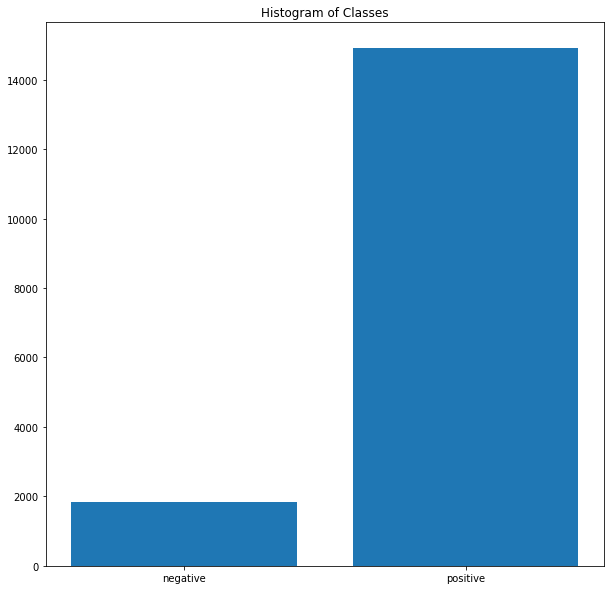

In [11]:
plt.figure(figsize=(10,10))
plt.hist(dfemo.emotype,bins=range(0,3), rwidth=0.8,align="left")
plt.title('Histogram of Classes')

In [12]:
frac=1-(dfemo.emotype.value_counts()[1]/dfemo.emotype.value_counts()[0])

dfemo = dfemo.drop(dfemo[dfemo['emotype'] == "positive"].sample(frac=frac).index)
dfemo

,art_style,painting,emotype,path
0,Abstract_Expressionism,aaron-siskind_yuchitan-1-1955,negative,dataset\wikiart\Abstract_Expressionism\aaron-siskind_yuchitan-1-1955.jpg
1,Abstract_Expressionism,aki-kuroda_conti-nuit-1979,negative,dataset\wikiart\Abstract_Expressionism\aki-kuroda_conti-nuit-1979.jpg
7,Abstract_Expressionism,alice-baber_wheel-of-day-1971,positive,dataset\wikiart\Abstract_Expressionism\alice-baber_wheel-of-day-1971.jpg
11,Abstract_Expressionism,atsuko-tanaka_93e-1993,negative,dataset\wikiart\Abstract_Expressionism\atsuko-tanaka_93e-1993.jpg
22,Abstract_Expressionism,clyfford-still_1947-r-no-1-1947,negative,dataset\wikiart\Abstract_Expressionism\clyfford-still_1947-r-no-1-1947.jpg
...,...,...,...,...
16710,Ukiyo_e,utagawa-kuniyoshi_the-actor-15,negative,dataset\wikiart\Ukiyo_e\utagawa-kuniyoshi_the-actor-15.jpg
16713,Ukiyo_e,utagawa-kuniyoshi_the-ghost-in-the-lantern,negative,dataset\wikiart\Ukiyo_e\utagawa-kuniyoshi_the-ghost-in-the-lantern.jpg
16714,Ukiyo_e,utagawa-kuniyoshi_the-hundred-and-eight-heroes-of-the-popular-suikoden-1,negative,dataset\wikiart\Ukiyo_e\utagawa-kuniyoshi_the-hundred-and-eight-heroes-of-the-popular-suikoden-1.jpg
16726,Ukiyo_e,utagawa-kuniyoshi_women-19,positive,dataset\wikiart\Ukiyo_e\utagawa-kuniyoshi_women-19.jpg


Text(0.5, 1.0, 'Histogram of Classes')

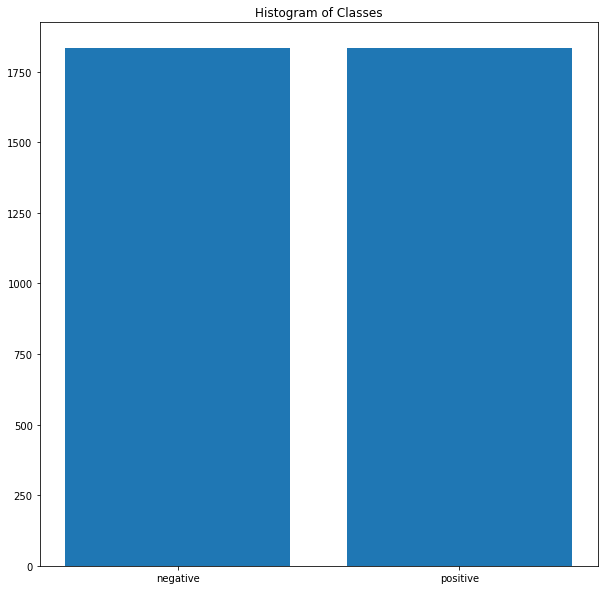

In [13]:
plt.figure(figsize=(10,10))
plt.hist(dfemo.emotype,bins=range(0,3), rwidth=0.8,align="left")
plt.title('Histogram of Classes')

In [29]:
imageDB=DataBlock(blocks=[ImageBlock,CategoryBlock],
                  get_x=ColReader('path'),
                  get_y=ColReader('emotype'),
                  item_tfms=Resize(256,ResizeMethod.Pad, PadMode.Zeros))

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


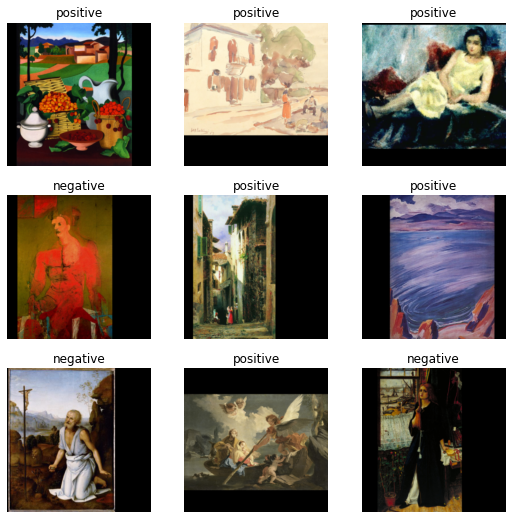

In [30]:
dls = imageDB.dataloaders(dfemo,bs=16)
dls.show_batch()

In [16]:
model = AutoModelForImageClassification.from_pretrained('microsoft/swinv2-tiny-patch4-window8-256')
model.classifier=nn.Sequential(nn.Linear(in_features=768, out_features=512, bias=True),
                               nn.ReLU(),
                               nn.Linear(in_features=512, out_features=256, bias=True),
                               nn.ReLU(),
                               nn.Linear(in_features=256, out_features=2, bias=True),
                               nn.Softmax())
opt_func = partial(ranger)

In [ ]:
opt_func = partial(ranger)
configuration = Swinv2Config()
#configuration.num_labels=2
configuration.return_dict=False
model = Swinv2ForImageClassification(configuration)

In [26]:
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]
        

In [27]:
learn = Learner(dls, model, loss_func=FocalLossFlat(), cbs=[DropOutput], metrics=error_rate,opt_func=opt_func )

In [28]:
lr=learn.lr_find(start_lr=1e-10,end_lr=1e-2 ,suggest_funcs=(minimum, steep, valley, slide))
learn.recorder.plot_lr_find()

TensorImage([[[[0., 0., 0.,  ..., 0., 0., 0.],
               [0., 0., 0.,  ..., 0., 0., 0.],
               [0., 0., 0.,  ..., 0., 0., 0.],
               ...,
               [0., 0., 0.,  ..., 0., 0., 0.],
               [0., 0., 0.,  ..., 0., 0., 0.],
               [0., 0., 0.,  ..., 0., 0., 0.]],

              [[0., 0., 0.,  ..., 0., 0., 0.],
               [0., 0., 0.,  ..., 0., 0., 0.],
               [0., 0., 0.,  ..., 0., 0., 0.],
               ...,
               [0., 0., 0.,  ..., 0., 0., 0.],
               [0., 0., 0.,  ..., 0., 0., 0.],
               [0., 0., 0.,  ..., 0., 0., 0.]],

              [[0., 0., 0.,  ..., 0., 0., 0.],
               [0., 0., 0.,  ..., 0., 0., 0.],
               [0., 0., 0.,  ..., 0., 0., 0.],
               ...,
               [0., 0., 0.,  ..., 0., 0., 0.],
               [0., 0., 0.,  ..., 0., 0., 0.],
               [0., 0., 0.,  ..., 0., 0., 0.]]],


             [[[0., 0., 0.,  ..., 0., 0., 0.],
               [0., 0., 0.,  ..., 0., 0

KeyboardInterrupt: 

In [ ]:
lrp=lr[2]

In [ ]:
learn.fit_flat_cos(30,lrp,pct_start=0.75, cbs=[SaveModelCallback (monitor='valid_loss', 
                                                                  comp=None, 
                                                                  min_delta=0.0,
                                                                  fname='artemis1_classification_model_swinv2_tiny_patch4_window8_256_refined_beforemode_balanced_focal_pretrain_densesoftmax_ranger_30', 
                                                                  every_epoch=False,
                                                                  at_end=False,
                                                                  with_opt=False, 
                                                                  reset_on_fit=True)])

In [ ]:
model=learn.load('artemis1_classification_model_swinv2_tiny_patch4_window8_256_refined_beforemode_balanced_focal_nopretrain_softmax_ranger_30')

In [ ]:
interp=ClassificationInterpretation(model,dls.valid,model.loss_func)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.print_classification_report()

In [ ]:
dfemo.emotype.value_counts()

In [ ]:
model